#***Resource and Dataset***

In [1]:
!pip install category_encoders
!pip install scikit-fuzzy

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import category_encoders as ce
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.metrics import davies_bouldin_score
import skfuzzy as fuzz



In [3]:
url = 'https://drive.google.com/file/d/1jm4UWji2gBJYte4RhvMAvhJ4GySRp55I/view?usp=sharing'
url = 'https://drive.google.com/uc?id=' + url.split('/')[-2]
df = pd.read_csv(url, sep=';')

#***Exploratory Data Analyst***

##**Cek Dataset**

In [4]:
df.head()

,City,Inf_Clothing,Inf_Footwear,Inf_Eduaction_Services,Inf_Basic_Education,Inf_Middle_Education,Inf_Higher_Education,Inf_Household,Inf_Furnitures_Equipment,Inf_Household_Textiles,...,Inf_Personal_Care,Inf_Food_Baverages_Services,Inf_Recreation_Sports_Culture,Inf_School_Supplies,Inf_recreation_Sport_Servoces,Inf_Transportation,Inf_Vehicle_Purchase,Inf_Personal_Transportation,Inf_Passenger_Transportation,Inf_Freight_Forwading_Services
0,KAB ACEH TENGAH,4.534,4.104,0.133,0.357,0.000,0.000,2.216,7.869,4.693,...,1.932,3.483,6.781,3.976,0.0,0.230,0.533,0.249,0.256,0.000
1,MEULABOH,2.411,1.266,1.182,2.186,0.000,0.000,2.368,1.655,0.510,...,9.002,3.012,0.773,1.728,0.0,1.031,2.215,0.545,3.186,1.206
2,KAB ACEH TAMIANG,2.373,3.073,3.061,8.125,0.214,2.343,0.581,1.826,3.473,...,0.976,2.231,6.010,3.267,0.0,0.337,1.982,0.223,0.000,0.000
3,KOTA BANDA ACEH,2.808,0.544,0.416,1.734,0.000,0.000,0.610,2.365,0.718,...,6.203,3.358,0.502,1.100,0.0,0.673,0.934,0.703,5.156,1.095
4,KOTA LHOKSEUMAWE,1.576,7.925,2.262,4.693,2.428,0.000,2.453,1.772,1.330,...,2.471,1.205,4.459,4.375,12.5,1.299,2.800,1.045,2.210,0.000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 36 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   City                             150 non-null    object 
 1   Inf_Clothing                     150 non-null    float64
 2   Inf_Footwear                     150 non-null    float64
 3   Inf_Eduaction_Services           150 non-null    float64
 4   Inf_Basic_Education              150 non-null    float64
 5   Inf_Middle_Education             150 non-null    float64
 6   Inf_Higher_Education             150 non-null    float64
 7   Inf_Household                    150 non-null    float64
 8   Inf_Furnitures_Equipment         150 non-null    float64
 9   Inf_Household_Textiles           150 non-null    float64
 10  Inf_Household_Tools              150 non-null    float64
 11  Inf_Tableware                    150 non-null    float64
 12  Inf_Housing_Equipment 

In [6]:
df.tail()

,City,Inf_Clothing,Inf_Footwear,Inf_Eduaction_Services,Inf_Basic_Education,Inf_Middle_Education,Inf_Higher_Education,Inf_Household,Inf_Furnitures_Equipment,Inf_Household_Textiles,...,Inf_Personal_Care,Inf_Food_Baverages_Services,Inf_Recreation_Sports_Culture,Inf_School_Supplies,Inf_recreation_Sport_Servoces,Inf_Transportation,Inf_Vehicle_Purchase,Inf_Personal_Transportation,Inf_Passenger_Transportation,Inf_Freight_Forwading_Services
295,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
296,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
297,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
298,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
299,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
df.describe()

,Inf_Clothing,Inf_Footwear,Inf_Eduaction_Services,Inf_Basic_Education,Inf_Middle_Education,Inf_Higher_Education,Inf_Household,Inf_Furnitures_Equipment,Inf_Household_Textiles,Inf_Household_Tools,...,Inf_Personal_Care,Inf_Food_Baverages_Services,Inf_Recreation_Sports_Culture,Inf_School_Supplies,Inf_recreation_Sport_Servoces,Inf_Transportation,Inf_Vehicle_Purchase,Inf_Personal_Transportation,Inf_Passenger_Transportation,Inf_Freight_Forwading_Services
count,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.00000,150.000000,150.000000,...,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000
mean,2.070020,2.394673,1.471087,2.336627,1.438253,1.156547,1.098840,1.81852,1.989547,1.683933,...,4.168767,2.758013,2.142967,2.238227,2.148827,1.277480,1.877380,0.824740,3.767473,2.576227
std,1.896407,2.811329,1.311457,2.708640,2.187614,2.140328,0.841282,2.03168,2.146460,1.753208,...,2.146403,2.232075,2.017179,1.928208,5.967647,0.952583,1.215474,0.696892,3.765894,4.230077
min,0.177000,0.000000,0.000000,0.000000,0.000000,0.000000,0.088000,0.00000,0.000000,0.000000,...,0.370000,0.326000,0.000000,0.000000,0.000000,0.104000,0.000000,0.062000,0.000000,0.000000
25%,0.808500,0.783250,0.425750,0.658000,0.051250,0.000000,0.484750,0.49175,0.483250,0.561000,...,2.642750,1.184750,0.735250,0.837750,0.000000,0.590500,0.930250,0.397500,1.041500,0.000000
50%,1.571000,1.467000,1.185000,1.855500,0.541000,0.075000,0.866000,1.35650,1.332500,1.073000,...,4.027500,2.117500,1.438500,1.724000,0.000000,1.044000,1.793500,0.659500,2.932500,0.717000
75%,2.588750,2.718750,2.151000,3.379250,1.852000,1.161750,1.382500,2.25025,2.800250,2.137250,...,5.477250,3.439500,2.905250,3.225000,0.449500,1.647000,2.620500,1.026750,5.282750,3.374500
max,15.400000,18.984000,6.480000,25.391000,12.407000,10.122000,4.450000,10.93700,11.175000,10.262000,...,9.837000,11.492000,9.838000,9.869000,36.000000,5.396000,5.653000,4.924000,23.296000,25.578000


##**Cek Duplikasi Data**

In [8]:
df.duplicated().sum()

149

In [9]:
cek_duplikat = df[df.duplicated()]
cek_duplikat

,City,Inf_Clothing,Inf_Footwear,Inf_Eduaction_Services,Inf_Basic_Education,Inf_Middle_Education,Inf_Higher_Education,Inf_Household,Inf_Furnitures_Equipment,Inf_Household_Textiles,...,Inf_Personal_Care,Inf_Food_Baverages_Services,Inf_Recreation_Sports_Culture,Inf_School_Supplies,Inf_recreation_Sport_Servoces,Inf_Transportation,Inf_Vehicle_Purchase,Inf_Personal_Transportation,Inf_Passenger_Transportation,Inf_Freight_Forwading_Services
151,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
152,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
153,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
154,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
155,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
296,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
297,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
298,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
df.drop_duplicates(inplace=True)

In [11]:
df.duplicated().sum()

0

In [12]:
df.tail()

,City,Inf_Clothing,Inf_Footwear,Inf_Eduaction_Services,Inf_Basic_Education,Inf_Middle_Education,Inf_Higher_Education,Inf_Household,Inf_Furnitures_Equipment,Inf_Household_Textiles,...,Inf_Personal_Care,Inf_Food_Baverages_Services,Inf_Recreation_Sports_Culture,Inf_School_Supplies,Inf_recreation_Sport_Servoces,Inf_Transportation,Inf_Vehicle_Purchase,Inf_Personal_Transportation,Inf_Passenger_Transportation,Inf_Freight_Forwading_Services
146,MERAUKE,1.330,3.911,2.721,10.246,0.258,2.222,0.641,0.221,3.538,...,5.106,6.405,3.173,3.791,0.000,2.236,2.025,1.039,7.724,3.849
147,TIMIKA,1.403,1.782,0.518,1.303,0.052,0.000,2.434,3.371,3.601,...,9.154,6.698,1.308,1.932,2.372,0.357,4.706,1.300,10.380,8.098
148,KAB NABIRE,2.498,4.667,0.730,1.102,1.453,0.399,3.626,0.000,4.892,...,4.375,6.328,5.610,5.802,0.000,1.806,2.415,0.501,5.957,4.905
149,KAB JAYAWIJAYA,3.039,0.846,0.728,0.988,0.860,0.000,1.206,5.735,0.468,...,0.370,1.466,2.960,3.069,0.000,1.518,0.229,1.103,3.005,3.898
150,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
df.duplicated().sum()

0

##**Check Missing Value**

In [14]:
df.isna().sum()

,0
City,1
Inf_Clothing,1
Inf_Footwear,1
Inf_Eduaction_Services,1
Inf_Basic_Education,1
Inf_Middle_Education,1
Inf_Higher_Education,1
Inf_Household,1
Inf_Furnitures_Equipment,1
Inf_Household_Textiles,1


In [15]:
df.isnull().sum()

,0
City,1
Inf_Clothing,1
Inf_Footwear,1
Inf_Eduaction_Services,1
Inf_Basic_Education,1
Inf_Middle_Education,1
Inf_Higher_Education,1
Inf_Household,1
Inf_Furnitures_Equipment,1
Inf_Household_Textiles,1


In [16]:
df.dropna(inplace = True)

In [17]:
df.tail()

,City,Inf_Clothing,Inf_Footwear,Inf_Eduaction_Services,Inf_Basic_Education,Inf_Middle_Education,Inf_Higher_Education,Inf_Household,Inf_Furnitures_Equipment,Inf_Household_Textiles,...,Inf_Personal_Care,Inf_Food_Baverages_Services,Inf_Recreation_Sports_Culture,Inf_School_Supplies,Inf_recreation_Sport_Servoces,Inf_Transportation,Inf_Vehicle_Purchase,Inf_Personal_Transportation,Inf_Passenger_Transportation,Inf_Freight_Forwading_Services
145,KOTA JAYAPURA,0.339,2.477,4.736,1.672,12.407,3.096,0.394,2.263,0.626,...,4.409,1.252,0.382,0.589,0.000,2.036,2.264,0.485,6.478,1.246
146,MERAUKE,1.330,3.911,2.721,10.246,0.258,2.222,0.641,0.221,3.538,...,5.106,6.405,3.173,3.791,0.000,2.236,2.025,1.039,7.724,3.849
147,TIMIKA,1.403,1.782,0.518,1.303,0.052,0.000,2.434,3.371,3.601,...,9.154,6.698,1.308,1.932,2.372,0.357,4.706,1.300,10.380,8.098
148,KAB NABIRE,2.498,4.667,0.730,1.102,1.453,0.399,3.626,0.000,4.892,...,4.375,6.328,5.610,5.802,0.000,1.806,2.415,0.501,5.957,4.905
149,KAB JAYAWIJAYA,3.039,0.846,0.728,0.988,0.860,0.000,1.206,5.735,0.468,...,0.370,1.466,2.960,3.069,0.000,1.518,0.229,1.103,3.005,3.898


##**Checking Outlier**

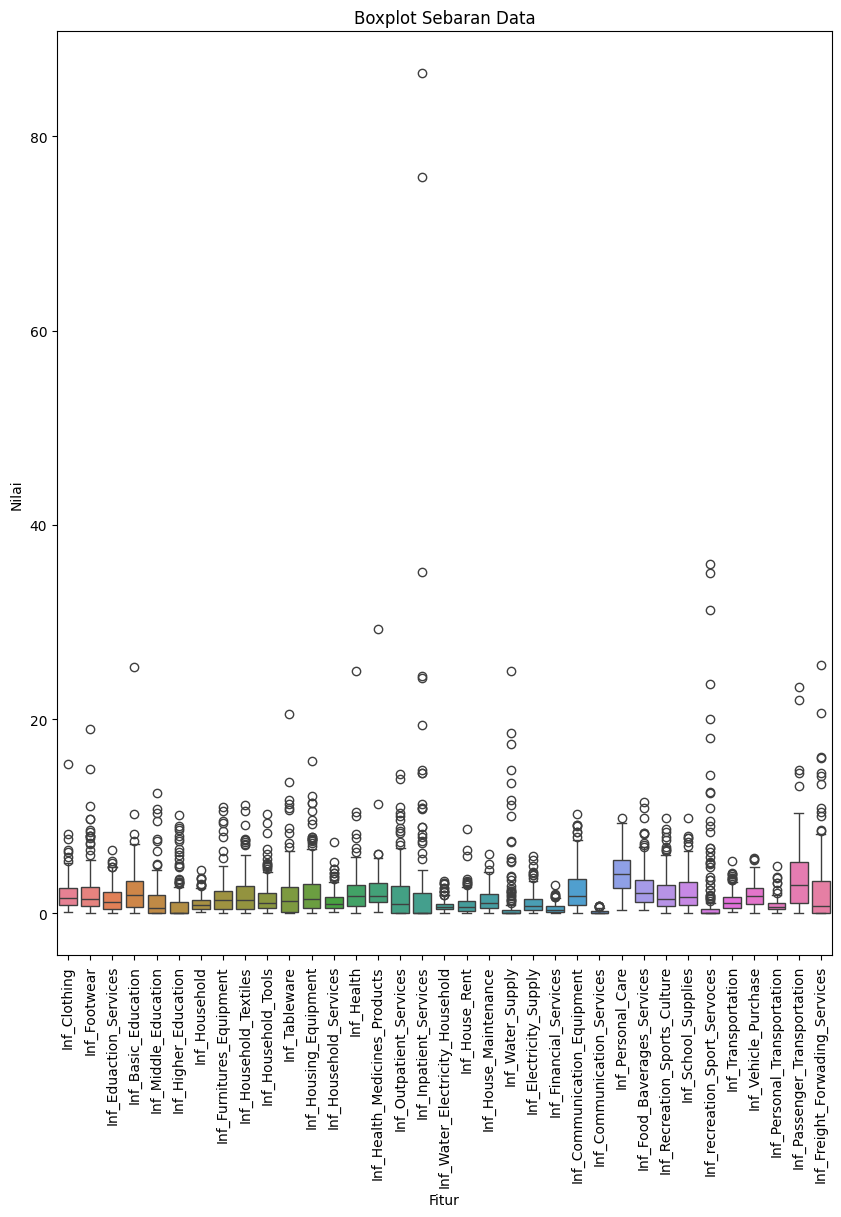

In [18]:
plt.figure(figsize=(10, 12))
sns.boxplot(data=df.iloc[:, :])
plt.title("Boxplot Sebaran Data")
plt.xlabel("Fitur")
plt.ylabel("Nilai")
plt.xticks(rotation=90)
plt.show()

#***Feature Engineering***

##**Feature Selection**

In [19]:
df_corr = df.copy()
df_corr.drop(columns=['City'], inplace=True)

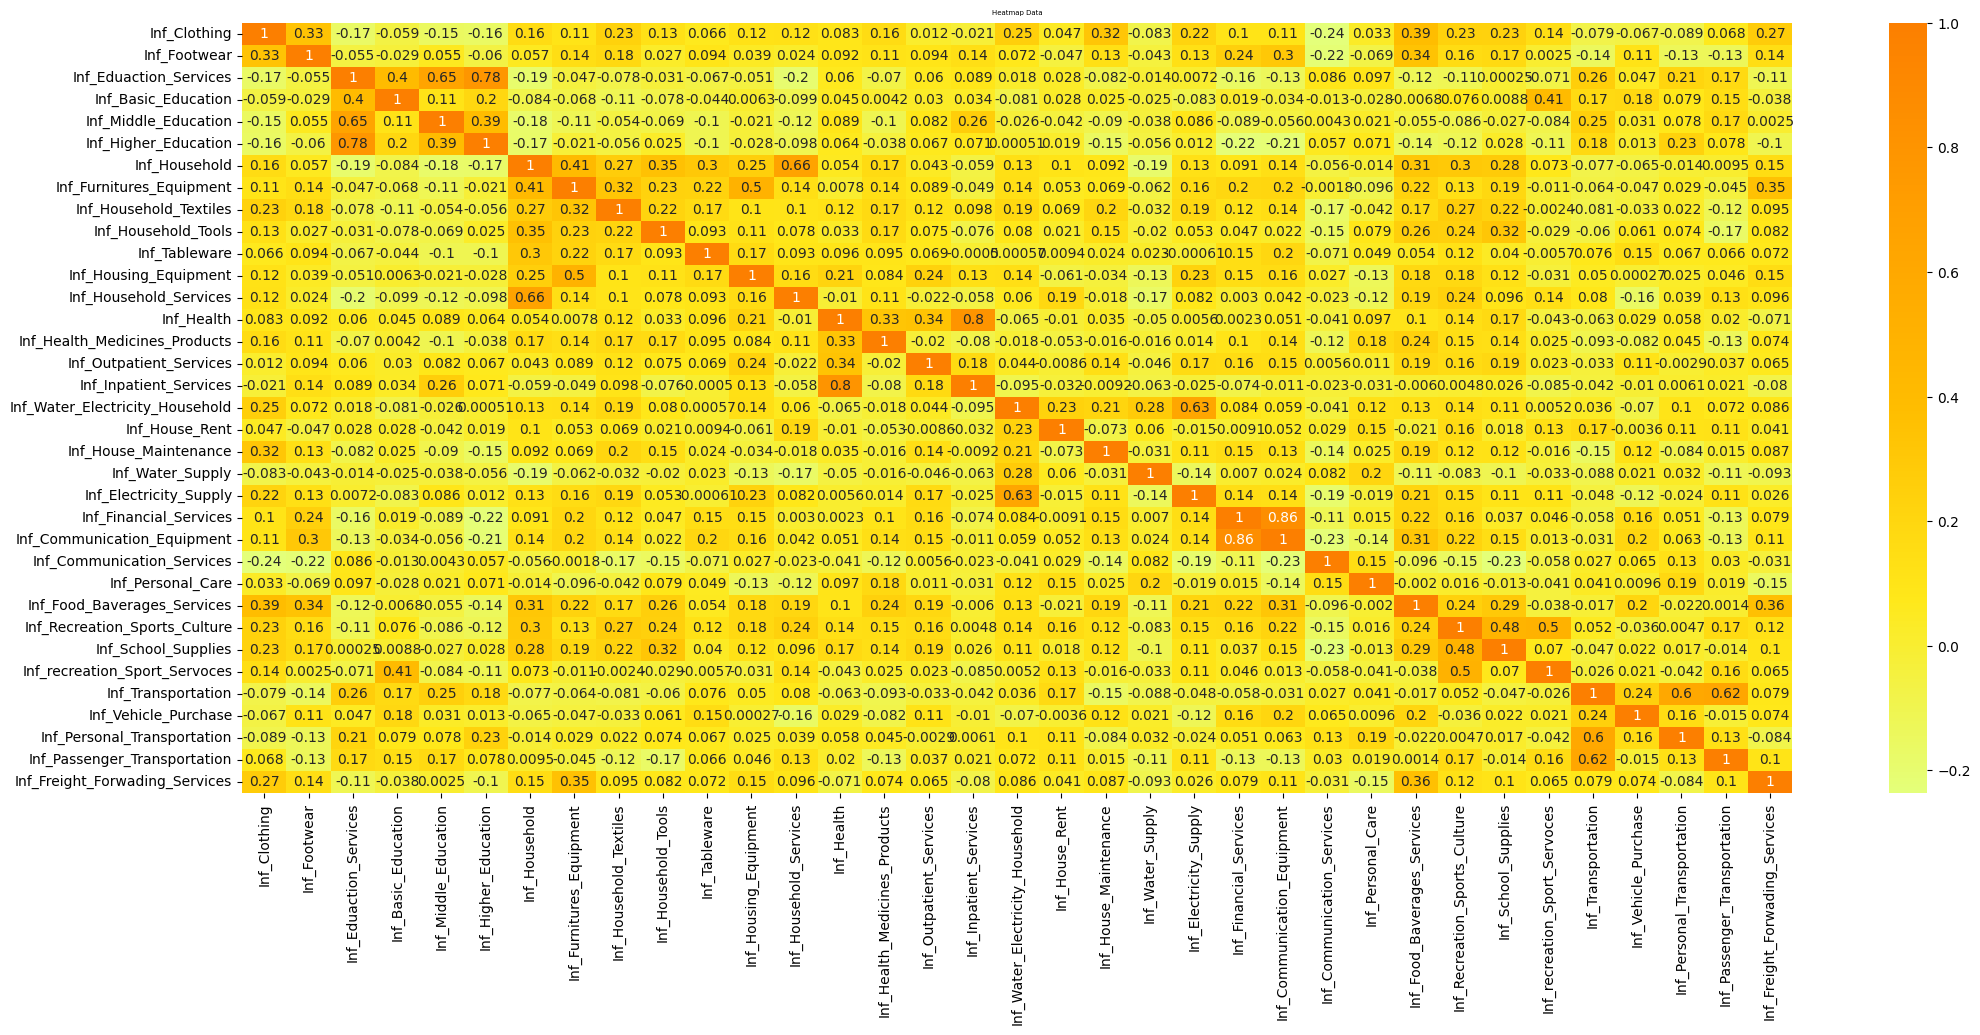

In [20]:
plt.figure(figsize=(25,10))
sns.heatmap(df_corr.corr(), cmap = 'Wistia', annot = True)
plt.title('Heatmap Data', fontsize = 5)
plt.show()

In [21]:
# df_selected = df_corr[['Inf_Basic_Education','Inf_Middle_Education','Inf_Higher_Education','Inf_Eduaction_Services','Inf_Furnitures_Equipment','Inf_Household_Services','Inf_Housing_Equipment','Inf_Household','Inf_Furnitures_Equipment','Inf_Inpatient_Services','Inf_Health','Inf_Water_Electricity_Household','Inf_Electricity_Supply','Inf_Communication_Equipment','Inf_Financial_Services','Inf_School_Supplies','Inf_Recreation_Sports_Culture','Inf_Personal_Transportation','Inf_Passenger_Transportation','Inf_Transportation']]

df_selected = df_corr[['Inf_Clothing',
                       'Inf_Health',
                       'Inf_Personal_Care',
                       'Inf_Food_Baverages_Services',
                       'Inf_Housing_Equipment',
                       'Inf_Transportation']]

In [22]:
df_selected.head()

,Inf_Clothing,Inf_Health,Inf_Personal_Care,Inf_Food_Baverages_Services,Inf_Housing_Equipment,Inf_Transportation
0,4.534,3.491,1.932,3.483,7.456,0.230
1,2.411,3.782,9.002,3.012,2.442,1.031
2,2.373,2.622,0.976,2.231,0.496,0.337
3,2.808,1.757,6.203,3.358,0.102,0.673
4,1.576,1.959,2.471,1.205,0.712,1.299


##**Standarisasi Nilai**

In [23]:
scaler = MinMaxScaler()
# scaler = StandardScaler()
df_selected_scaled = scaler.fit_transform(df_selected)

In [24]:
df_selected_scaled = pd.DataFrame(df_selected_scaled, columns=df_selected.columns)
df_selected_scaled.head()

,Inf_Clothing,Inf_Health,Inf_Personal_Care,Inf_Food_Baverages_Services,Inf_Housing_Equipment,Inf_Transportation
0,0.286212,0.136941,0.164994,0.282733,0.475237,0.023810
1,0.146752,0.148641,0.911799,0.240552,0.155650,0.175170
2,0.144255,0.102002,0.064012,0.170607,0.031615,0.044029
3,0.172831,0.067224,0.616140,0.271539,0.006501,0.107521
4,0.091900,0.075346,0.221929,0.078721,0.045382,0.225813


#***Modelling KMeans***

##**Model**

In [25]:
cluster_kmeans = KMeans(n_clusters=7, random_state = 42)
cluster_kmeans.fit(df_selected_scaled)

KMeans(n_clusters=7, random_state=42)

In [26]:
segment = pd.Series(cluster_kmeans.labels_, name="Segment_Kmeans")
df_segment_kmeans = pd.concat([df, segment], axis=1)
df_segment_kmeans.head(10)

,City,Inf_Clothing,Inf_Footwear,Inf_Eduaction_Services,Inf_Basic_Education,Inf_Middle_Education,Inf_Higher_Education,Inf_Household,Inf_Furnitures_Equipment,Inf_Household_Textiles,...,Inf_Food_Baverages_Services,Inf_Recreation_Sports_Culture,Inf_School_Supplies,Inf_recreation_Sport_Servoces,Inf_Transportation,Inf_Vehicle_Purchase,Inf_Personal_Transportation,Inf_Passenger_Transportation,Inf_Freight_Forwading_Services,Segment_Kmeans
0,KAB ACEH TENGAH,4.534,4.104,0.133,0.357,0.000,0.000,2.216,7.869,4.693,...,3.483,6.781,3.976,0.000,0.230,0.533,0.249,0.256,0.000,3
1,MEULABOH,2.411,1.266,1.182,2.186,0.000,0.000,2.368,1.655,0.510,...,3.012,0.773,1.728,0.000,1.031,2.215,0.545,3.186,1.206,4
2,KAB ACEH TAMIANG,2.373,3.073,3.061,8.125,0.214,2.343,0.581,1.826,3.473,...,2.231,6.010,3.267,0.000,0.337,1.982,0.223,0.000,0.000,1
3,KOTA BANDA ACEH,2.808,0.544,0.416,1.734,0.000,0.000,0.610,2.365,0.718,...,3.358,0.502,1.100,0.000,0.673,0.934,0.703,5.156,1.095,4
4,KOTA LHOKSEUMAWE,1.576,7.925,2.262,4.693,2.428,0.000,2.453,1.772,1.330,...,1.205,4.459,4.375,12.500,1.299,2.800,1.045,2.210,0.000,1
5,KAB LABUHANBATU,5.792,2.603,0.300,1.140,0.000,0.000,2.423,1.438,2.878,...,3.954,2.409,3.283,0.000,1.175,1.857,0.875,6.116,0.454,0
6,KAB KARO,4.917,7.114,0.000,0.000,0.000,0.000,1.025,4.027,7.668,...,3.155,5.770,7.310,5.167,1.009,0.999,1.170,0.306,0.282,4
7,KAB DELI SERDANG,3.310,0.700,0.261,0.789,0.000,0.000,0.425,1.971,0.000,...,0.718,1.056,2.082,0.000,0.104,0.814,0.281,0.729,0.000,1
8,KOTA SIBOLGA,2.598,2.523,3.121,3.988,3.620,6.593,2.973,1.934,1.907,...,0.700,1.580,1.257,0.000,0.358,0.628,0.345,1.040,0.000,6
9,KOTA PEMATANGSIANTAR,0.457,1.535,5.387,4.133,2.206,10.122,1.944,8.515,7.513,...,2.213,2.350,5.892,0.000,1.761,3.069,2.425,1.400,0.000,6


In [27]:
df_segment_kmeans['Segment_Kmeans'].value_counts()

,count
Segment_Kmeans,
6,49
1,35
0,18
4,17
5,11
3,10
2,10


##**Silhouette Score**

In [28]:
silhouette_avg = silhouette_score(df_selected_scaled, cluster_kmeans.labels_)
print(f"Silhouette Score untuk kmeans 7 cluster: {silhouette_avg}")

Silhouette Score untuk kmeans 7 cluster: 0.1994844309761091


##**Davies-Boulding Index**

In [29]:
dbi_score = davies_bouldin_score(df_selected_scaled, cluster_kmeans.labels_)
print(f"Davies-Bouldin Index kmeans 7 cluster: {dbi_score}")

Davies-Bouldin Index kmeans 7 cluster: 1.2759413248535245


#***Modelling CMeans***

##**Modelling**

In [30]:
data_array = df_selected_scaled.values.T
np.random.seed(42)
n_clusters = 7

init_centers = np.random.rand(n_clusters, data_array.shape[0])
cntr, u, u0, d, jm, p, fpc = fuzz.cluster.cmeans(
    data_array, c=n_clusters, m=2, error=0.005, maxiter=1000, init=None)

cluster_cmeans = np.argmax(u, axis=0)

In [31]:
df['Segment_Cmeans'] = cluster_cmeans
df_segment_cmeans = pd.concat([df], axis=1)
df_segment_cmeans.head(10)

,City,Inf_Clothing,Inf_Footwear,Inf_Eduaction_Services,Inf_Basic_Education,Inf_Middle_Education,Inf_Higher_Education,Inf_Household,Inf_Furnitures_Equipment,Inf_Household_Textiles,...,Inf_Food_Baverages_Services,Inf_Recreation_Sports_Culture,Inf_School_Supplies,Inf_recreation_Sport_Servoces,Inf_Transportation,Inf_Vehicle_Purchase,Inf_Personal_Transportation,Inf_Passenger_Transportation,Inf_Freight_Forwading_Services,Segment_Cmeans
0,KAB ACEH TENGAH,4.534,4.104,0.133,0.357,0.000,0.000,2.216,7.869,4.693,...,3.483,6.781,3.976,0.000,0.230,0.533,0.249,0.256,0.000,6
1,MEULABOH,2.411,1.266,1.182,2.186,0.000,0.000,2.368,1.655,0.510,...,3.012,0.773,1.728,0.000,1.031,2.215,0.545,3.186,1.206,2
2,KAB ACEH TAMIANG,2.373,3.073,3.061,8.125,0.214,2.343,0.581,1.826,3.473,...,2.231,6.010,3.267,0.000,0.337,1.982,0.223,0.000,0.000,1
3,KOTA BANDA ACEH,2.808,0.544,0.416,1.734,0.000,0.000,0.610,2.365,0.718,...,3.358,0.502,1.100,0.000,0.673,0.934,0.703,5.156,1.095,2
4,KOTA LHOKSEUMAWE,1.576,7.925,2.262,4.693,2.428,0.000,2.453,1.772,1.330,...,1.205,4.459,4.375,12.500,1.299,2.800,1.045,2.210,0.000,1
5,KAB LABUHANBATU,5.792,2.603,0.300,1.140,0.000,0.000,2.423,1.438,2.878,...,3.954,2.409,3.283,0.000,1.175,1.857,0.875,6.116,0.454,5
6,KAB KARO,4.917,7.114,0.000,0.000,0.000,0.000,1.025,4.027,7.668,...,3.155,5.770,7.310,5.167,1.009,0.999,1.170,0.306,0.282,2
7,KAB DELI SERDANG,3.310,0.700,0.261,0.789,0.000,0.000,0.425,1.971,0.000,...,0.718,1.056,2.082,0.000,0.104,0.814,0.281,0.729,0.000,1
8,KOTA SIBOLGA,2.598,2.523,3.121,3.988,3.620,6.593,2.973,1.934,1.907,...,0.700,1.580,1.257,0.000,0.358,0.628,0.345,1.040,0.000,1
9,KOTA PEMATANGSIANTAR,0.457,1.535,5.387,4.133,2.206,10.122,1.944,8.515,7.513,...,2.213,2.350,5.892,0.000,1.761,3.069,2.425,1.400,0.000,4


In [32]:
df_segment_cmeans['Segment_Cmeans'].value_counts()

,count
Segment_Cmeans,
1,31
0,29
2,20
5,20
3,18
6,17
4,15


##**Silhouette Score**

In [33]:
silhouette_avg = silhouette_score(df_selected_scaled, cluster_cmeans)
print(f"Silhouette Score untuk Fuzzy C-Means 7 cluster: {silhouette_avg}")

Silhouette Score untuk Fuzzy C-Means 7 cluster: 0.09132334295263493


##**Davies-Bouldin Index Evaluation**

In [34]:
dbi_score = davies_bouldin_score(df_selected_scaled, cluster_cmeans)
print(f"Davies-Bouldin Index cmeans 7 cluster: {dbi_score}")

Davies-Bouldin Index cmeans 7 cluster: 1.4547761248405544


#***Modelling DBSCAN***

##**Modelling**

In [35]:
dbscan = DBSCAN(eps=0.5, min_samples=2)

In [36]:
cluster_dbscan = dbscan.fit_predict(df_selected_scaled)
df['Segment_DBSCAN'] = cluster_dbscan
df_segment_dbscan = pd.concat([df], axis=1)

In [37]:
df_segment_dbscan['Segment_DBSCAN'].value_counts()

,count
Segment_DBSCAN,
0,147
-1,3


In [38]:
# Hasil label dari DBSCAN (misalnya, dbscan_labels)
unique_labels = np.unique(cluster_dbscan)

# Menghitung jumlah cluster tanpa noise (label -1)
num_clusters = len(unique_labels) - (1 if -1 in unique_labels else 0)

print(f"Jumlah cluster yang dihasilkan oleh DBSCAN (tanpa noise): {num_clusters}")

# Menampilkan label cluster yang ditemukan
print(f"Label cluster yang dihasilkan: {unique_labels}")


Jumlah cluster yang dihasilkan oleh DBSCAN (tanpa noise): 1
Label cluster yang dihasilkan: [-1  0]


##**Silhouette Score**

In [39]:
silhouette_avg = silhouette_score(df_selected_scaled, cluster_dbscan)
print(f"Silhouette Score untuk Fuzzy C-Means 2 cluster: {silhouette_avg}")

Silhouette Score untuk Fuzzy C-Means 2 cluster: 0.49454816103720894


##**Davies-Bouldin Index Evaluation**

In [40]:
dbi_score = davies_bouldin_score(df_selected_scaled, cluster_dbscan)
print(f"Davies-Bouldin Index cmeans 2 cluster: {dbi_score}")

Davies-Bouldin Index cmeans 2 cluster: 1.8143547972817635
